<a href="https://colab.research.google.com/github/az3ertyuiop/projets/blob/main/visualisation_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Découverte et entraînement sur altair avec les stats des swiss stage de LoL.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall scipy -y
!pip uninstall pingouin -y
!pip install pingouin

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 18.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [3]:
import pandas as pd
import altair as alt
import pingouin as pg
from sklearn import decomposition

In [4]:
#Chargement des données.
data= '/content/drive/MyDrive/champions.csv'
df=pd.read_csv(data, on_bad_lines="skip")
df=df.dropna() #On ne travaille que sur les champions pick, même certains champions non-pick ont simplement été permaban.
df['Winrate'] = df['Winrate'].str.replace('%', '').astype(float)  #Change le winrate en float
df['Presence'] = df['Presence'].str.replace('%', '').astype(float) #change la présence en float
df

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,9,30,100.0,7.0,2.0,78.0,6.6,3.6,32:52:00,7.9,678.0,402.0,0.6,76.0,-10.0
1,Yone,18,19,95.0,13.0,5.0,72.0,4.4,3.2,32:14:00,9.6,711.0,451.0,6.7,434.0,372.0
2,Rell,26,5,79.0,15.0,11.0,58.0,3.0,8.8,34:22:00,1.0,144.0,247.0,-0.5,11.0,-58.0
3,Jax,15,15,77.0,6.0,9.0,40.0,2.6,5,35:00:00,7.8,403.0,396.0,-8.9,-128.0,-201.0
4,Skarner,13,17,77.0,7.0,6.0,54.0,3.9,4,31:48:00,5.8,372.0,332.0,2.4,77.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Urgot,1,0,3.0,0.0,1.0,0.0,2.3,-,33:26:00,10.2,640.0,474.0,20.0,445.0,613.0
63,Xin Zhao,1,0,3.0,1.0,0.0,100.0,11.0,-,32:48:00,7.2,341.0,383.0,2.0,647.0,14.0
67,Camille,1,0,3.0,1.0,0.0,100.0,6.5,-,39:50:00,8.8,554.0,466.0,15.0,821.0,448.0
68,Lillia,1,0,3.0,0.0,1.0,0.0,4.0,-,45:40:00,6.7,386.0,347.0,-7.0,-865.0,-495.0


Utilisons maintenant Altair pour visualiser deux-trois trucs.

In [5]:
#Le winrate en fonction du nbr de picks.
alt.Chart(df).mark_point().encode(
    x='Picks',
    y='Winrate',
    tooltip=['Champion', 'Bans', 'Picks', 'Wins',	'Losses','CSM','Winrate'],
    color=alt.Color('Presence', scale=alt.Scale(scheme='reds'))
)

alt.Chart(...)

In [6]:
alt.Chart(df).mark_boxplot().encode(
    x='Picks',
)
#boîte à moustache des picks.

alt.Chart(...)

In [7]:
#Tests
reg = pg.linear_regression(df[['DPM',	'GPM']], df['Winrate'])
from scipy.stats import spearmanr
coef, p_value = spearmanr(df['GPM'], df['Winrate'])  #GPM influe significativement sur le %de winrate
print(f"Spearman correlation coefficient: {coef}, p-value: {p_value}")
print(reg)

Spearman correlation coefficient: 0.3521604451768626, p-value: 0.0043200862627112745
       names       coef         se         T      pval        r2    adj_r2  \
0  Intercept -17.662342  25.299889 -0.698119  0.487755  0.119292  0.090416   
1        DPM  -0.020073   0.030541 -0.657235  0.513502  0.119292  0.090416   
2        GPM   0.203858   0.095025  2.145315  0.035917  0.119292  0.090416   

    CI[2.5%]  CI[97.5%]  
0 -68.252596  32.927912  
1  -0.081143   0.040998  
2   0.013844   0.393872  


In [8]:
df_2 = df.drop('Champion', axis=1)
df_2 = df_2.drop('Avg BT', axis=1)
df_2 = df_2.drop('GT', axis=1)
matrix = df_2.to_numpy()

In [9]:
pca=  decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [10]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.82025561 0.09769917]
[5843.5828027  2016.74056699]


In [11]:
to_plot=pca.transform(matrix)
to_plot.shape

(64, 2)

In [12]:
import matplotlib.pyplot as plt

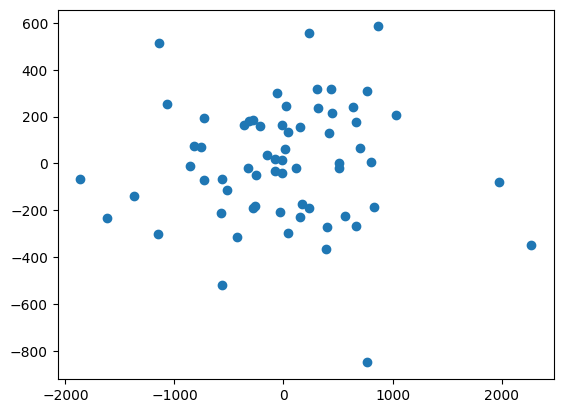

In [13]:
plt.scatter(x=to_plot[:,0], y=to_plot[:,1])

In [14]:
df_plot = df.copy()

In [15]:
df_plot['PC1']=to_plot[:,0]
df_plot['PC2']=to_plot[:,1]

In [16]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    tooltip=['Champion','Winrate','Picks'],
    color=alt.Color('Winrate', scale=alt.Scale(scheme='reds'))
)
#PCA ne permet pas de faire de distinctions car les variations de statistiques entre champions sont inhérentes à leurs roles dans la partie.
#Il faudrait mieux analyser les champions selon leur rôle (Top,Jgl,Mid,Adc,Supp) et avec moins de variables
#On ne peut rien déduire de cette PCA.

alt.Chart(...)

Utilisons cette fois des données plus claires sur des champions picks au moins 4x


In [17]:
df_3=df.copy()
df_3=df_3.drop(['CSD@15','GD@15','XPD@15','KDA','Avg BT','GT','Presence','Wins','Losses'], axis=1) #On vire les stats qui ne sont pas intéressantes pour une PCA
df_3=df_3[df_3['Picks']>=4] #On vire les champions dont les données n'ont pas suffisamment de représentation.
#into the matrix
#tjr le pb des noms de champion, on le vire puis on va re-label par la suite avec altair.
df_4=df_3.drop('Champion', axis=1)
matrix2=df_4.to_numpy()


In [18]:
pca2=decomposition.PCA(n_components=2)
pca.fit(matrix2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.97704418 0.01434252]
[1400.26984747  169.65525516]


In [19]:
to_plot2=pca.transform(matrix2)
to_plot2.shape

(35, 2)

In [20]:
#plt.scatter(x=to_plot2[:,0], y=to_plot2[:,1])
df_plot2=df_3.copy()
df_plot2['PC1']=to_plot2[:,0]
df_plot2['PC2']=to_plot2[:,1]

alt.Chart(df_plot2).mark_point().encode(
    x=alt.X('PC1',title='PC1 (97%)'),
    y=alt.X('PC2',title='PC2 (3%)'),
    tooltip=['Champion','Winrate','Picks','Bans','GPM','DPM','CSM'],
    color=alt.Color('Winrate', scale=alt.Scale(scheme='turbo'))
)

alt.Chart(...)

In [21]:
#Factor Analysis
fa = decomposition.FactorAnalysis(n_components=2)
fa.fit(matrix2)
tplt=fa.transform(matrix2)
dfplt =df_3.copy()
dfplt['PC1']=tplt[:,0]
dfplt['PC2']=tplt[:,1]
alt.Chart(dfplt).mark_point().encode(
    x='PC1',
    y='PC2',
    tooltip=['Champion','Winrate','Picks'],
    color=alt.Color('Winrate', scale=alt.Scale(scheme='turbo'))
)

alt.Chart(...)